In [1]:
#%matplotlib
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc

import scipy.interpolate


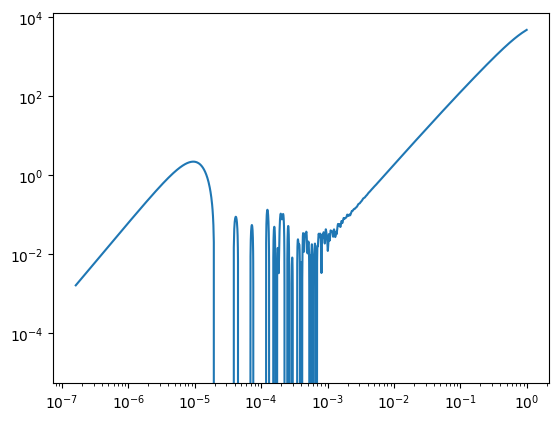

In [4]:
mv_test = 1
cs_factor = 2.67
kvec = [1]
k_ind = 0
H0=67
Omega_M = 0.3
Omega_R = 7e-5
Omega_lambda = 1 - Omega_M - Omega_R
Tv_k = 1.947
# in MeV
kb = 8.617e-11 # MeV/K
T0 = Tv_k * kb
# 
h = 0.6704
cosmo_dict ={'H0':H0, 'Omega_cdm':Omega_M, 'k_output_values':str(kvec).strip('[]'), "N_ncdm":1,
             "m_ncdm":mv_test # massen er givet i eV s' jeg min egen test m_v skal være en faktor  1e-6 mindre
           ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
            "ncdm_fluid_approximation":3
            }
H0 /= (3*1e5) # i 1/Mpc
cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
bg = cosmo.get_background()
pts = cosmo.get_perturbations()['scalar']
#print(bg.keys())
z = bg["z"]
a = 1/(z+1)
aend = a[-1]
a0 = a[0]
mv = mv_test * 1e-6
# cs front faktoren



    # udregner Hubbleparameteren

def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) 

# udregnger tau 

def tau_cal(a,y):
    # Vores "tids"-værdi i denne differentialligning er a
    tau = y[0]
    d_tau = 1 / (a ** 2 * H(a))
    return np.array(d_tau)

# temperatur

def Tv(a):
    return T0 / a # in MeV

# lydhastighed

def cs(a,mv,factor):
    return factor * Tv(a) / mv

# udregn a
def a_solve(tau,y):
    a = y[0]
    a_dt = a * a * H(a)
    return [a_dt]

delta_class = pts[k_ind]["delta_cdm"]
theta_class = pts[k_ind]["theta_cdm"]
tau_class = pts[k_ind]["tau [Mpc]"]
delta_neutrino_class = pts[k_ind]["delta_ncdm[0]"]
theta_neutrino_class = pts[k_ind]["theta_ncdm[0]"]
a_class = pts[k_ind]["a"]

interp_tau_from_a = scipy.interpolate.interp1d(a_class,tau_class)

z = 3600
z = 800
#z = 3000
a0 = 1/(1+z)
T_ini = interp_tau_from_a(a0)
a_span = [a0,1]

delta_init = scipy.interpolate.interp1d(tau_class,delta_class)(T_ini)
theta_init = scipy.interpolate.interp1d(tau_class,theta_class)(T_ini)
delta_neutrino_init = scipy.interpolate.interp1d(tau_class,delta_neutrino_class)(T_ini)
theta_neutrino_init = scipy.interpolate.interp1d(tau_class,theta_neutrino_class)(T_ini)

#y0 = [delta_init,theta_init,delta_neutrino_init,theta_neutrino_init]
y0 = [delta_init,-theta_init]
k=1
def func1(a,y,mv,cs_factor,k):
    delta = y[0]
    theta = y[1]
    delta_cdm = y[2]

    theta_cdm = y[3]

    d_delta_cdm = 1/(a**2 * H(a)) * (-theta_cdm)
    d_theta_cdm = 1/(a**2 * H(a))*(-a*H(a)*theta_cdm - 3/2 * H0**2 * Omega_M/a * delta_cdm)
    d_delta = -theta/(a**2 * H(a))
    d_theta = 1/(a**2 * H(a)) * (-a*H(a)*theta-3/2 *H0**2* Omega_M /a * delta_cdm + k**2 * cs(a,mv,cs_factor)**2 * delta)
    return [d_delta,d_theta,d_delta_cdm,d_theta_cdm]


y0 =[delta_neutrino_init,theta_neutrino_init,delta_init,theta_init]
#print(a_span)
sol = scipy.integrate.solve_ivp(func1,a_span,y0,args=(mv,cs_factor,k))
plt.figure(333333)

def paste():
    plt.loglog(sol.t,-sol.y[0])
    plt.loglog(sol.t,-sol.y[2])
    return None
plt.loglog(a_class,-delta_neutrino_class)
a = sol.t
#print(delta_cdm1)

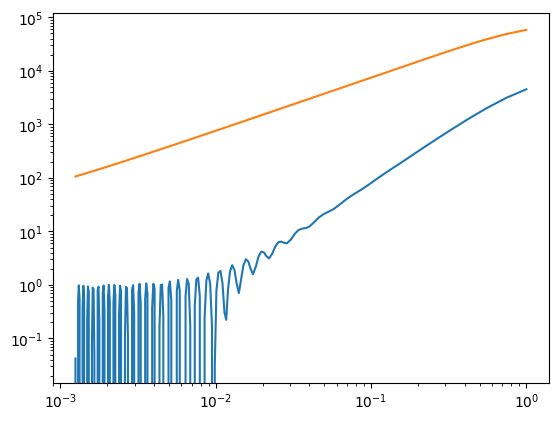

In [5]:
cs_factor = 2.67
import scipy.special as special
mv_test = 1
kvec = [1]
k_ind = 0
k = kvec[k_ind]
H0=67
Omega_M = 0.3
Omega_R = 7e-5
Omega_lambda = 1 - Omega_M - Omega_R
Tv_k = 1.947
# in MeV
kb = 8.617e-11 # MeV/K
T0 = Tv_k * kb
# 
h = 0.6704
cosmo_dict ={'H0':H0, 'Omega_cdm':Omega_M, 'k_output_values':str(kvec).strip('[]'), "N_ncdm":1,
             "m_ncdm":mv_test # massen er givet i eV s' jeg min egen test m_v skal være en faktor  1e-6 mindre
           ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
            "ncdm_fluid_approximation":3
            }
H0 /= (3*1e5) # i 1/Mpc
cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
bg = cosmo.get_background()
pts = cosmo.get_perturbations()['scalar']
#print(bg.keys())
z = bg["z"]
a = 1/(z+1)
aend = a[-1]
a0 = a[0]
mv = mv_test * 1e-6
# cs front faktoren



    # udregner Hubbleparameteren

def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) 

# udregnger tau 

def tau_cal(a,y):
    # Vores "tids"-værdi i denne differentialligning er a
    tau = y[0]
    d_tau = 1 / (a ** 2 * H(a))
    return np.array(d_tau)

# temperatur

def Tv(a):
    return T0 / a # in MeV

# lydhastighed

def cs(a,mv,factor):
    return factor * Tv(a) / mv

# udregn a
def a_solve(tau,y):
    a = y[0]
    a_dt = a * a * H(a)
    return [a_dt]

delta_class = pts[k_ind]["delta_cdm"]
theta_class = pts[k_ind]["theta_cdm"]
tau_class = pts[k_ind]["tau [Mpc]"]
delta_neutrino_class = pts[k_ind]["delta_ncdm[0]"]
theta_neutrino_class = pts[k_ind]["theta_ncdm[0]"]
a_class = pts[k_ind]["a"]

interp_tau_from_a = scipy.interpolate.interp1d(a_class,tau_class)

z = 3600
z = 800
#z = 3000
a0 = 1/(1+z)
T_ini = interp_tau_from_a(a0)
a_span = [a0,1]

delta_init = scipy.interpolate.interp1d(tau_class,delta_class)(T_ini)
theta_init = scipy.interpolate.interp1d(tau_class,theta_class)(T_ini)
delta_neutrino_init = scipy.interpolate.interp1d(tau_class,delta_neutrino_class)(T_ini)
theta_neutrino_init = scipy.interpolate.interp1d(tau_class,theta_neutrino_class)(T_ini)

#y0 = [delta_init,theta_init,delta_neutrino_init,theta_neutrino_init]
y0 = [delta_init,-theta_init]
beta = ((cs_factor*k*T0)/(H0*mv))**2 / Omega_M
delta0 = delta_init
paste()


[-0.04233069 -0.06668102 -0.14825132 -0.38906302]
(delta_cdm1[0] / a[0] )=-85088.37080388512


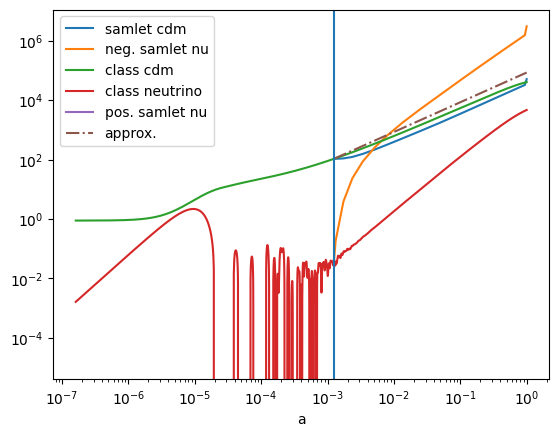

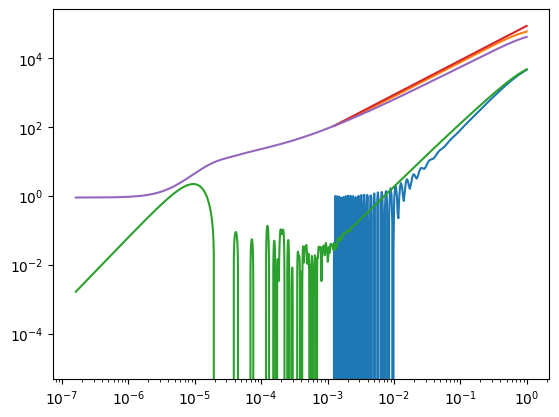

In [6]:
def f(mv_test,kvec,k_ind,H0=67,T_ini=1000):

    Res = np.zeros(len(kvec))
    Res1 = np.zeros(len(kvec))
    Res2 = np.zeros(len(kvec))
    Res4 = np.zeros(len(kvec))
    Omega_M = 0.3
    Omega_R = 7e-5
    Omega_lambda = 1 - Omega_M - Omega_R
    Tv_k = 1.947
    # in MeV
    kb = 8.617e-11 # MeV/K
    T0 = Tv_k * kb
    # 
    h = 0.6704
    cosmo_dict ={'H0':H0, 'Omega_cdm':Omega_M, 'k_output_values':str(kvec).strip('[]'), "N_ncdm":1,
                 "m_ncdm":mv_test # massen er givet i eV s' jeg min egen test m_v skal være en faktor  1e-6 mindre
               ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
                "ncdm_fluid_approximation":3
                }
    H0 /= (3*1e5) # i 1/Mpc
    cosmo = Class()
    cosmo.set(cosmo_dict)
    cosmo.compute()
    bg = cosmo.get_background()
    pts = cosmo.get_perturbations()['scalar']
    #print(bg.keys())
    z = bg["z"]
    a = 1/(z+1)
    aend = a[-1]
    a0 = a[0]
    mv = mv_test * 1e-6
    # cs front faktoren



    # udregner Hubbleparameteren

    def H(a):
        return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) 

    # udregnger tau 

    def tau_cal(a,y):
        # Vores "tids"-værdi i denne differentialligning er a
        tau = y[0]
        d_tau = 1 / (a ** 2 * H(a))
        return np.array(d_tau)

    # temperatur

    def Tv(a):
        return T0 / a # in MeV

    # lydhastighed

    def cs(a,mv,factor):
        return factor * Tv(a) / mv

    # udregn a
    def a_solve(tau,y):
        a = y[0]
        a_dt = a * a * H(a)
        return [a_dt]

    tau_init =   (1/H0) * (Omega_R ** (-0.5)) * a0


    sol_tau = sc.solve_ivp(tau_cal,t_span=[a0,aend],y0=[tau_init])
    tau = sol_tau.y[0]

    sol_a = sc.solve_ivp(a_solve,t_span=[tau[0],tau[-1]],y0=[a0])
    a_tau = sol_a.t
    a = sol_a.y[0]

    a_interp = scipy.interpolate.interp1d(a_tau,a)

    # simulerings funktionerne

    def func_det_hele(τ,y,k,mv,factor):
        delta = y[0]
        theta = y[1]    
        a = a_interp(τ)
        d_delta   = - theta
        d_theta      =  -  H(a) * a * theta    - (3/2) * H0*H0 * Omega_M * delta / a
        delta_nu = y[2]
        theta_nu = y[3]
        d_delta_nu   = - theta_nu
        d_theta_nu   =  -  H(a) * a * theta_nu - (3/2) * H0*H0 * Omega_M * delta / a  + k**2 * cs(a,mv,factor)**2 * delta_nu
        return [d_delta,d_theta,d_delta_nu,d_theta_nu]

    def func(a,y):
        delta = y[0]
        d_delta = y[1]
        #a = a_interp(τ)
        dd_delta = -3/2 * (1/a) * d_delta + 3/2 *(1/a)**2 * delta
        return [d_delta,dd_delta]
    
    delta_class = pts[k_ind]["delta_cdm"]
    theta_class = pts[k_ind]["theta_cdm"]
    tau_class = pts[k_ind]["tau [Mpc]"]
    delta_neutrino_class = pts[k_ind]["delta_ncdm[0]"]
    theta_neutrino_class = pts[k_ind]["theta_ncdm[0]"]
    a_class = pts[k_ind]["a"]

    interp_tau_from_a = scipy.interpolate.interp1d(a_class,tau_class)
    
    z = 3600
    z = 800
    #z = 3000
    a0 = 1/(1+z)
    T_ini = interp_tau_from_a(a0)
    a_span = [a0,1]
    
    delta_init = scipy.interpolate.interp1d(tau_class,delta_class)(T_ini)
    theta_init = scipy.interpolate.interp1d(tau_class,theta_class)(T_ini)
    delta_neutrino_init = scipy.interpolate.interp1d(tau_class,delta_neutrino_class)(T_ini)
    theta_neutrino_init = scipy.interpolate.interp1d(tau_class,theta_neutrino_class)(T_ini)

    #y0 = [delta_init,theta_init,delta_neutrino_init,theta_neutrino_init]
    y0 = [delta_init,-theta_init]
    #sol_en = sc.solve_ivp(func_det_hele, t_span = τ_span, y0 = y0,args=(k,mv,factor))
    sol = sc.solve_ivp(func,t_span=a_span,y0 = y0)
    a = sol.t
    delta = sol.y[0]
    delta_interp = scipy.interpolate.interp1d(a,delta)
    #τ_cdm_en = sol_en.t
    #delta_cdm_en = sol_en.y[0]
    #delta_nu_en = sol_en.y[2]

    #plt.loglog(tau_class,-delta_class)
    #plt.loglog(a_class,-delta_class)
    ##print(delta)
    #plt.loglog(a,-delta)
    #plt.axvline(a0)
    #plt.title("delta(a) test k = %s mv= %s eV"%(kvec[k_ind],mv_test))
    #plt.xlabel("a")
    #plt.figure(134)
    
    def func1(a,y,n,mv,factor,k,A):
        delta = y[0]
        theta = y[1]
        #a = a_interp(τ)
        #A = delta_class[0] / (a**(n))
        delta_cdm = A * a** n
        d_delta = - theta
        d_theta =  -  H(a) * a * theta - (3/2) * H0*H0 * Omega_M * delta_cdm / a  + k**2 * cs(a,mv,factor)**2 * delta
        return [d_delta,d_theta]
    
    def F(a,y,k,mv,factor,A):
        delta_cdm = y[0]
        d_delta_cdm = y[1]
        delta_nu = y[2]
        d_delta_nu = y[3]
        d2_delta_cdm = - 3/2 * 1/a * d_delta_cdm + 3/2 * 1/a**2 *delta_cdm
        d2_delta_nu = + (k**2 * cs(a,mv,factor)**2)/(a*Omega_M) * delta_nu+ 1/2 * 1/a * d_delta_nu + 3/2 *1/a * A# * a#delta_cdm 
        return [d_delta_cdm,d2_delta_cdm,d_delta_nu,d2_delta_nu]
    
    
    def F1(a,y,k,mv,factor,A):
        delta_cdm = y[0]
        d_delta_cdm = y[1]
        delta_nu = y[2]
        d_delta_nu = y[3]
        d2_delta_cdm = - 3/2 * 1/a * d_delta_cdm + 3/2 * 1/a**2 *delta_cdm
        d2_delta_nu = + (k**2 * cs(a,mv,factor)**2)/(a*Omega_M) * delta_nu+ 1/2 * 1/a * d_delta_nu + 3/2 * delta_cdm/(a**2)  
        return [d_delta_cdm,d2_delta_cdm,d_delta_nu,d2_delta_nu]
        
        
    
    #plt.loglog(a_class,-delta_class,label="class cdm")
    #print(delta)
    n= 0.9
    A = delta[0] / (a[0]**(n))
    #plt.loglog(a,-A * a** n,"-.",label="a^%s"%n)
    n= 1
    A = delta[0] / (a[0]**(n))
    #plt.loglog(a,-A * a** n,"-.",label="a^%s"%n)
    n= 0.85
    A = delta[0] / (a[0]**(n))
    #plt.loglog(a,-A * a** n,"-.",label="a^%s"%n)
    
    y0 = [delta_neutrino_init,-theta_neutrino_init]
    #sol_en = sc.solve_ivp(func_det_hele, t_span = τ_span, y0 = y0,args=(k,mv,factor))
    
    
    n = 1
    k = kvec[k_ind]
    cs_factor = 2.67
    A =  delta_init / (a_span[0]**(n))
    sol = sc.solve_ivp(func1,t_span=a_span,y0 = y0,args=(n,mv,cs_factor,k,A))
    #,t_eval=np.logspace(np.log10(a_span[0]),0,50))
    a = sol.t
    delta = sol.y[0]
    print(delta)
    #plt.axvline(a0)
    #plt.title("For the meme")
    #
    #plt.loglog(a_class,-delta_neutrino_class,label="class neutrino")
    #plt.loglog(a,delta,label="min neu - positive")
    #plt.loglog(a,-delta,label="min neu - negative")
    #plt.xlabel("a")
    #plt.legend(loc="upper left")
    
    y1 = [delta_init,-theta_init,delta_neutrino_init,-theta_neutrino_init]
    A =  delta[0] / (a_span[0]**(1))
    sol = sc.solve_ivp(F,t_span=a_span,y0=y1,args=(k,mv,cs_factor,A))
    
    a = sol.t
    delta_cdm = sol.y[0]
    delta_nu = sol.y[2]
    
    #plt.figure(2132)
    #
    #
    #plt.loglog(a,-delta_cdm,label="samlet cdm")
    #plt.loglog(a,-delta_nu,label="neg. samlet nu")
    #plt.loglog(a_class,-delta_class,label="class cdm")
    #plt.loglog(a_class,-delta_neutrino_class,label="class neutrino")
    #plt.loglog(a,delta_nu,label="pos. samlet nu")
    #A = delta_cdm[0] / a[0]
    #plt.loglog(a,-A*a,"-.",label="approx.")
    #plt.xlabel("a")
    #plt.axvline(a0)
    #plt.legend(loc="upper left")
    A =  delta[0] / (a_span[0]**(1))
    sol1 = sc.solve_ivp(F1,t_span=a_span,y0=y1,args=(k,mv,cs_factor,A))
    
    a = sol.t
    delta_cdm = sol1.y[0]
    delta_nu = sol1.y[2]
    plt.figure(11323223)
    plt.loglog(a,-delta_cdm,label="samlet cdm")
    plt.loglog(a,-delta_nu,label="neg. samlet nu")
    plt.loglog(a_class,-delta_class,label="class cdm")
    plt.loglog(a_class,-delta_neutrino_class,label="class neutrino")
    plt.loglog(a,delta_nu,label="pos. samlet nu")
    A = delta_cdm[0] / a[0]
    plt.loglog(a,-A*a,"-.",label="approx.")
    plt.xlabel("a")
    plt.axvline(a0)
    plt.legend(loc="upper left")
    
    cs_factor = 2.67
    beta = ((cs_factor*k*T0)/(H0*mv))**2 / Omega_M
    delta0 = delta_init

    def f(a,c1):
        return np.exp(1/3 * (beta * (1/a**2 -1) + (a**2 -1))) * (c1 - delta0/(3*a0) * (np.exp(1-beta/2) - np.exp(a**2 / 2 - beta/(2*a))*(1/a) * np.exp(-beta * np.log(a))))

    a = a_class
    
    #np.logspace(a0,0,30)
    #plt.figure(1212222)
    #plt.loglog(a_class,-delta_neutrino_class)
    #plt.loglog(a,-f(a,0))
    ##plt.loglog(a,-f(a,0))
    #plt.figure(12312122)
    #plt.loglog(a,-f(a,0))
    #plt.loglog(a,f(a,0))
    
    k = kvec[k_ind]
    delta_cdm1 = sol1.y[0]
    def func1(a,y,mv,cs_factor,k):
        delta = y[0]
        theta = y[1]
        delta_cdm = y[2]
        
        theta_cdm = y[3]
        
        d_delta_cdm = 1/(a**2 * H(a)) * (-theta_cdm)
        d_theta_cdm = 1/(a**2 * H(a))*(-a*H(a)*theta_cdm - 3/2 * H0**2 * Omega_M/a * delta_cdm)
        d_delta = -theta/(a**2 * H(a))
        d_theta = 1/(a**2 * H(a)) * (-a*H(a)*theta-3/2 *H0**2* Omega_M /a * delta_cdm + k**2 * cs(a,mv,cs_factor)**2 * delta)
        return [d_delta,d_theta,d_delta_cdm,d_theta_cdm]
    
    
    y0 =[delta_neutrino_init,theta_neutrino_init,delta_init,theta_init]
    #print(a_span)
    sol = scipy.integrate.solve_ivp(func1,a_span,y0,args=(mv,cs_factor,k))
    plt.figure(333333)
    plt.loglog(sol.t,-sol.y[0])
    plt.loglog(sol.t,-sol.y[2])
    plt.loglog(a_class,-delta_neutrino_class)
    a = sol.t
    #print(delta_cdm1)
    delta  = a * (delta_cdm1[0] / a[0] )
    print(f"{(delta_cdm1[0] / a[0] )=}")
    #print(delta)
    plt.loglog(a,-delta)
    plt.loglog(a_class,-delta_class)
    
    return None

kvec = [1e-2,1e-1,1,1e1]
mv = 1
f(mv,kvec = kvec,k_ind=2)


0.00023160563740996413
211929.38095276518
-136673699.88294506
[2.07283811e-04 1.84715251e-04 1.64603902e-04 1.46682227e-04
 1.30711821e-04 1.16480234e-04 1.03798148e-04 9.24968573e-05
 8.24260233e-05 7.34516774e-05 6.54544365e-05 5.83279159e-05
 5.19773135e-05 4.63181494e-05 4.12751414e-05 3.67812039e-05
 3.27765554e-05 2.92079234e-05 2.60278354e-05 2.31939877e-05
 2.06686824e-05 1.84183263e-05 1.64129835e-05 1.46259776e-05
 1.30335365e-05 1.16144766e-05 1.03499205e-05 9.22304623e-06
 8.21886327e-06 7.32401333e-06]


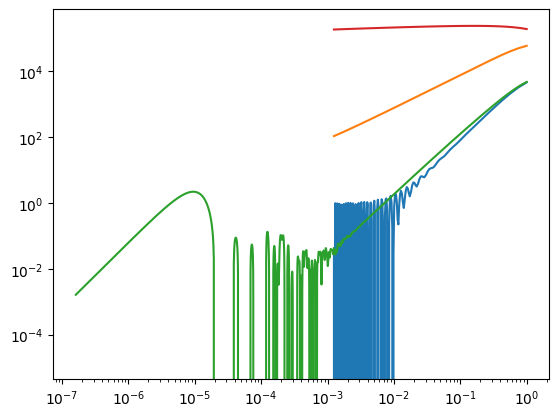

In [22]:


def g(a,c1,c2):
    val = 2*cs_factor*k*T0/(np.sqrt(a)*H0*mv*np.sqrt(Omega_M))
    print(val)
    si,ci = special.sici(val)
    return 4 * cs_factor**2 * delta0*k**2*T0/(a0*H0**2 * mv**2 * Omega_M) *(ci*np.cos(val)+si*np.sin(val)) + a *delta0/a0 + c1 * np.sin(val) + c2*np.cos(val)

def f():
    a = 1e-3
    print(2*cs_factor*k*T0/(np.sqrt(a)*H0*mv*np.sqrt(Omega_M)))
    
    val = 2*cs_factor*k*T0/(np.sqrt(a)*H0*mv*np.sqrt(Omega_M))
    si,ci = special.sici(val)
    return 4 * cs_factor**2 * delta0*k**2*T0/(a0*H0**2 * mv**2 * Omega_M) *(ci*np.cos(val)+si*np.sin(val)) + a *delta0/a0 

print(f())

print((-1e3-np.cos(2*k*cs(1,mv,cs_factor)/(H0*np.sqrt(Omega_M))))/np.sin(2*k*cs(1,mv,cs_factor)/(H0*np.sqrt(Omega_M))))

paste()

plt.loglog(a_class,-delta_neutrino_class)
a = np.logspace(np.log10(a0),0,30)
#plt.loglog(a_class,delta_neutrino_class)
plt.loglog(a,g(a,-10008,-33001))
#plt.loglog(a,-f(a,0))

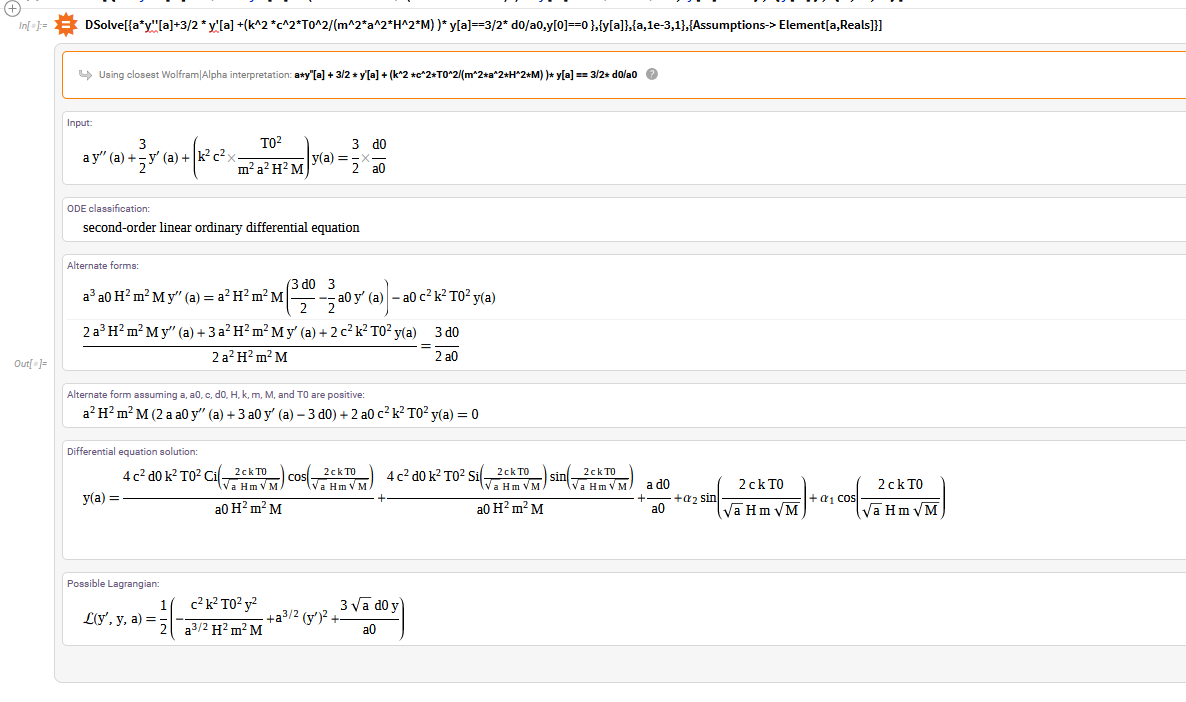

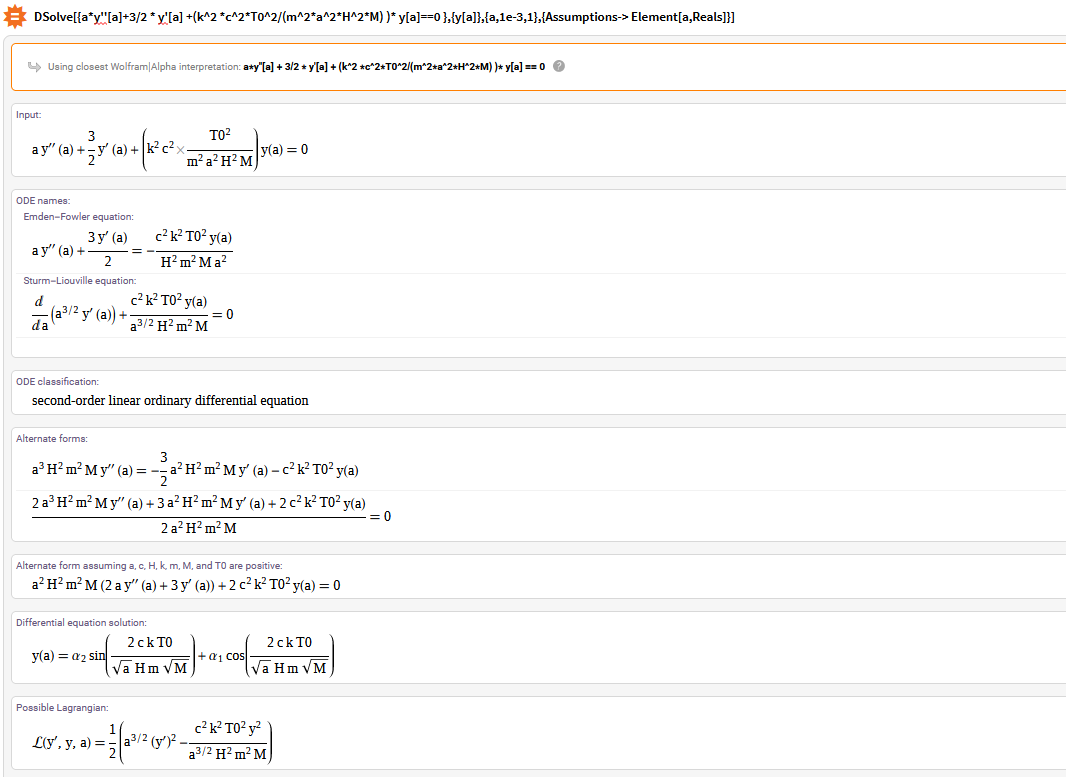